In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import shutil

from skimage.external.tifffile import imsave,imread

In [2]:
myDir=r'/project/hackathon/hackers03/shared/patches/raw_20X'

In [3]:
fileList=os.listdir(myDir)
fileList

['data_190705_20X_10K_0001.npy',
 'data_190709_20X_25K_0001.npy',
 'data_190705_20X_5K_0001.npy',
 'data_190709_20X_25K_0002.npy',
 'data_190625_20X_25K_0001.npy',
 'data_190710_20X_50K_0002.npy',
 'data_190625_20X_12K_0001.npy',
 'data_190710_20X_50K_0005.npy',
 'data_190710_20X_50K_0004.npy',
 'data_190625_20X_100K_0001.npy',
 'data_190701_20X_10K_0001.npy',
 'data_190710_20X_50K_0001.npy',
 'data_190705_20X_10K_0002.npy',
 'data_190709_20X_50K_0002.npy',
 'data_190704_20X_10K_0003.npy',
 'data_190710_20X_50K_0003.npy',
 'data_190627_20X_100K_0001.npy',
 'data_190627_20X_25K_0001.npy',
 'data_190625_20X_50K_0001.npy',
 'data_190709_20X_50K_0003.npy',
 'data_190627_20X_12K_0001.npy',
 'data_190704_20X_5K_0001.npy',
 'data_190704_20X_10K_0002.npy',
 'data_190704_20X_10K_0001.npy',
 'data_190627_20X_50K_0001.npy',
 'data_190709_20X_50K_0001.npy']

In [9]:
newDir=r'/project/hackathon/hackers03/shared/single_tiff'
try:
    os.mkdir(newDir)
except:
    pass

In [55]:
i=0
myDataFrame=pd.DataFrame(columns=['file','patch','phase_path','ch1','ch2'])

for myFile in fileList:
    
    temp=np.load(os.path.join(myDir,myFile))
    
    for myCell in range(temp.shape[0]):
        
        # save phase image
        
        phase_im = temp[myCell,0,:,:]
        
        phase_im = (phase_im-np.min(phase_im))/(np.max(phase_im)-np.min(phase_im))*255
        
        phase_path=os.path.join(newDir,f'cell_{str(i).zfill(6)}_phase.tif')
        imsave(phase_path,phase_im.astype('uint8'))
        
        # measure fluorescent signal
        ch_fucci1=np.mean(temp[myCell,1,120:130,120:130])
        ch_fucci2=np.mean(temp[myCell,2,120:130,120:130])
        
        # save data in a data frame
        myDataFrame.loc[i,'file']=myFile
        myDataFrame.loc[i,'patch']=myCell
        
        myDataFrame.loc[i,'phase_path']=phase_path
        
        myDataFrame.loc[i,'ch1']=ch_fucci1
        myDataFrame.loc[i,'ch2']=ch_fucci2
        
        i=i+1
        

In [56]:
len(myDataFrame)

22642

In [57]:
myDataFrame.head()

,file,patch,phase_path,ch1,ch2
0,data_190705_20X_10K_0001.npy,0,/project/hackathon/hackers03/shared/single_tif...,399.18,1451.24
1,data_190705_20X_10K_0001.npy,1,/project/hackathon/hackers03/shared/single_tif...,411.53,1890.39
2,data_190705_20X_10K_0001.npy,2,/project/hackathon/hackers03/shared/single_tif...,408.36,1865.33
3,data_190705_20X_10K_0001.npy,3,/project/hackathon/hackers03/shared/single_tif...,767.62,197.58
4,data_190705_20X_10K_0001.npy,4,/project/hackathon/hackers03/shared/single_tif...,392.83,1545.21


In [62]:
test=imread(myDataFrame.loc[1100,'phase_path'])

<IPython.core.display.Javascript object>


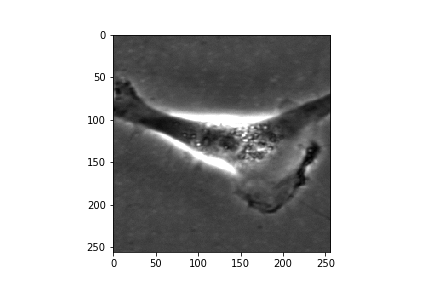

In [63]:
%matplotlib notebook

plt.imshow(test,cmap='gray')

### Look at the distribution of fluorescent signals

<IPython.core.display.Javascript object>


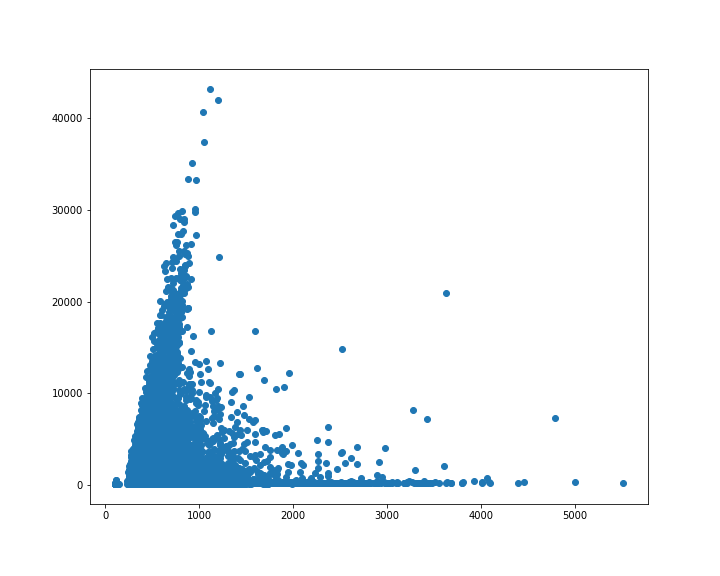

In [68]:
%matplotlib notebook

fig,ax=plt.subplots(1,figsize=(10,8))
plt.scatter(myDataFrame.loc[:,'ch1'],myDataFrame.loc[:,'ch2'])

<IPython.core.display.Javascript object>


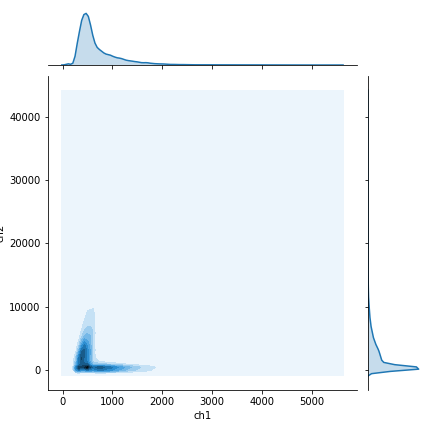

In [74]:
%matplotlib notebook

sns.jointplot(x='ch1', y='ch2', data=myDataFrame, kind="kde");

### Assign labels

In [82]:
myDataFrame['ratio']=myDataFrame.ch2/myDataFrame.ch1

<IPython.core.display.Javascript object>


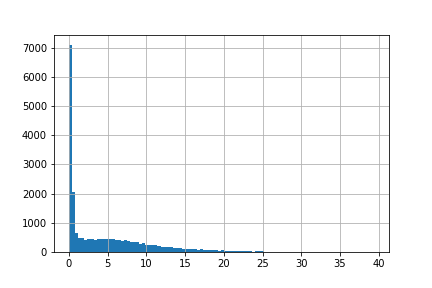

In [83]:
%matplotlib notebook
myDataFrame['ratio'].hist(bins=100)

In [85]:
arbPerc=np.percentile(myDataFrame['ratio'],50)
arbPerc

2.525668944282902

In [87]:
myDataFrame['label']='early'
myDataFrame.loc[myDataFrame.ratio>arbPerc,'label']='late'

In [88]:
myDataFrame.head()

,file,patch,phase_path,ch1,ch2,ratio,label
0,data_190705_20X_10K_0001.npy,0,/project/hackathon/hackers03/shared/single_tif...,399.18,1451.24,3.63555,late
1,data_190705_20X_10K_0001.npy,1,/project/hackathon/hackers03/shared/single_tif...,411.53,1890.39,4.59357,late
2,data_190705_20X_10K_0001.npy,2,/project/hackathon/hackers03/shared/single_tif...,408.36,1865.33,4.56786,late
3,data_190705_20X_10K_0001.npy,3,/project/hackathon/hackers03/shared/single_tif...,767.62,197.58,0.257393,early
4,data_190705_20X_10K_0001.npy,4,/project/hackathon/hackers03/shared/single_tif...,392.83,1545.21,3.93353,late


In [90]:
myDataFrame.to_csv('/project/hackathon/hackers03/shared/raw20_df.csv')

In [ ]:
shutil.make_archive('/project/hackathon/hackers03/shared/single.zip', 'zip', '/project/hackathon/hackers03/shared/single_tiff')

In [ ]:
def convert_bytes(num):
    """
    this function will convert bytes to MB.... GB... etc
    """
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if num < 1024.0:
            return "%3.1f %s" % (num, x)
        num /= 1024.0


def file_size(file_path):
    """
    this function will return the file size
    """
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)

In [ ]:
file_size('/project/hackathon/hackers03/shared/single.zip')